<a href="https://colab.research.google.com/github/ricardoricrob76/Unifacisa_Streamlit/blob/main/Engenharia_de_Features_Selec%C3%A7%C3%A3o_Inicial_Parte_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import das bibliotecas básicas
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [2]:
# Carregando os dados e colocando em um dataframe
data = pd.read_csv('train.csv')

In [3]:
# Separando as Features de Seleção e a de Classificação
X = data.iloc[:,0:20]  #independent columns
y = data.iloc[:,-1]    #target column i.e price range

In [4]:
# Treinar o modelo com as características do chi2 para 10 colunas mais importantes
bestfeatures = SelectKBest(score_func=chi2, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

In [5]:
# concatenar dois dataframes para melhor visualizar os dados
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features

            Specs          Score
13            ram  931267.519053
11      px_height   17363.569536
0   battery_power   14129.866576
12       px_width    9810.586750
8       mobile_wt      95.972863
6      int_memory      89.839124
15           sc_w      16.480319
16      talk_time      13.236400
4              fc      10.135166
14           sc_h       9.614878


In [6]:
# Outra técnica de seleção de features - ExtraTreesClassifier.
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.06206687 0.01985709 0.03359382 0.01939089 0.03129747 0.01716068
 0.035387   0.03369372 0.03584201 0.03290258 0.03303021 0.04743209
 0.04741923 0.39902131 0.03311456 0.03360197 0.03405846 0.0144434
 0.0168994  0.01978723]


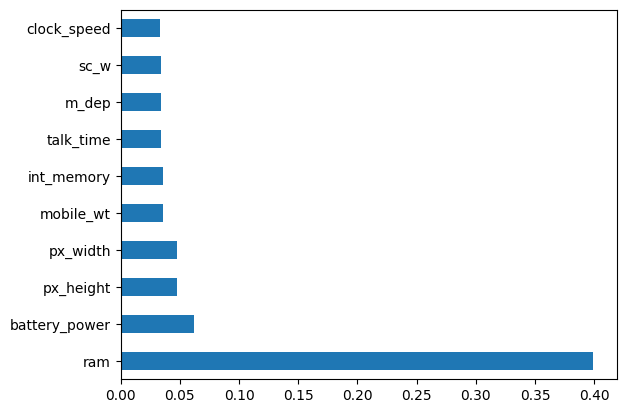

In [7]:
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [11]:
# 3 forma utilizando a matriz de correlação para identificar as melhores features
corrmat = data.corr()
top_corr_features = corrmat.index

# declaração do objeto do seaborn
import seaborn as sns

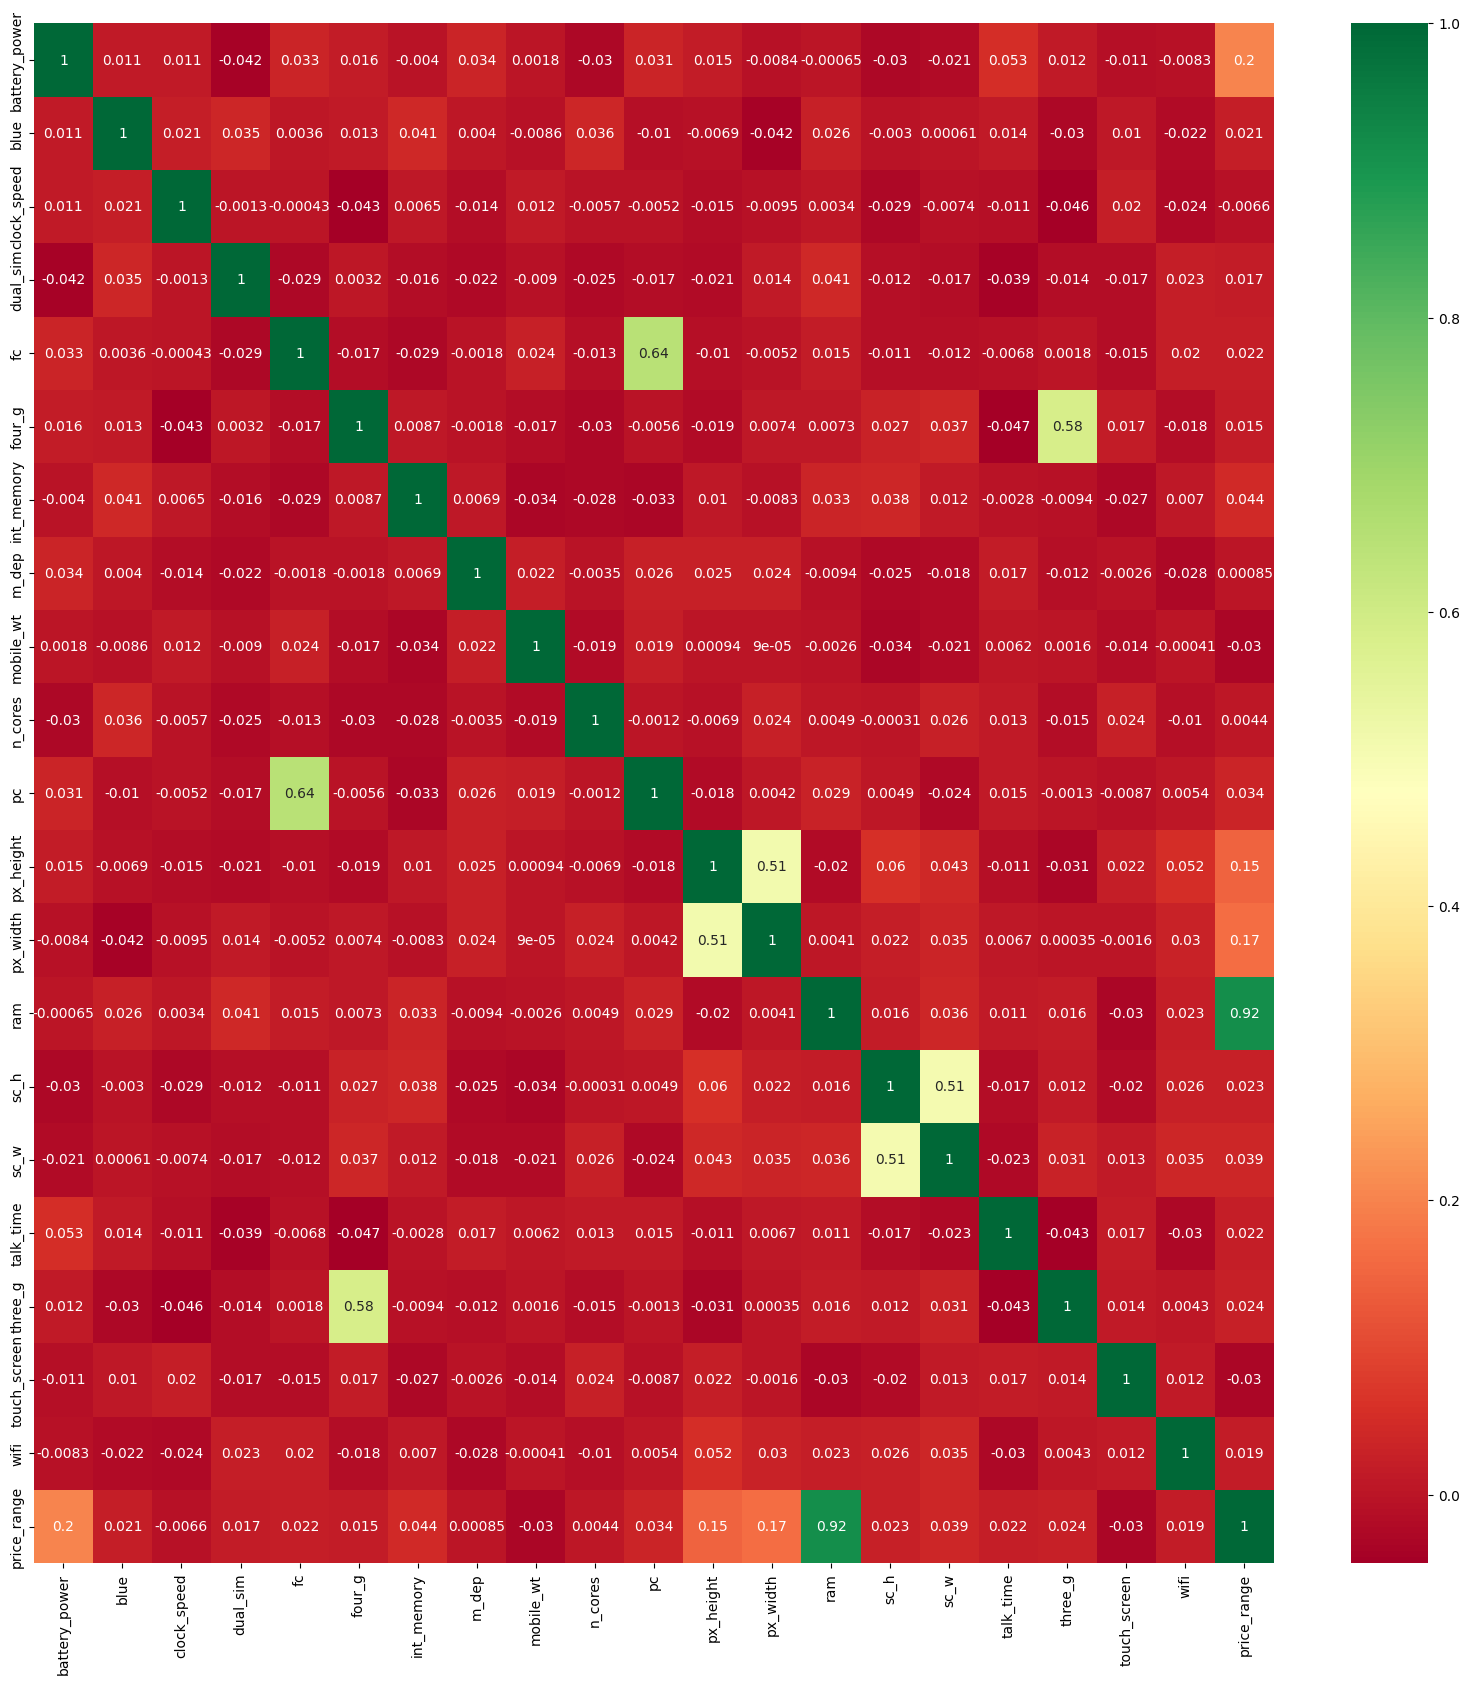

In [12]:
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(data[top_corr_features].corr(),annot=True,cmap="RdYlGn")